In [9]:
from flair.data import Sentence
from clarin_datasets.polemo_dataset import PolemoDataset
from clarin_datasets.aspectemo_dataset import AspectEmoDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from clarin_datasets.utils import embed_sentence

In [2]:
raw_text = "a"

In [3]:
embedding = embed_sentence(raw_text)

In [10]:
dataset = AspectEmoDataset()

In [11]:
dataset.load_data()

2022-09-22 15:45:48.816 WARNING datasets.builder: No config specified, defaulting to: aspectemo/1.0
2022-09-22 15:45:48.830 WARNING datasets.builder: Reusing dataset aspectemo (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___aspectemo/1.0/1.0.0/968ba95943dbf225ce5847233e07ecab3eb9b26791d66cb7ef72a5179503c625)


  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
embedded_text = np.array([embed_sentence(text) for text in dataset.data_dict["train"]["text"].values])

In [9]:
embedded_text.shape

(6573, 300)

In [10]:
tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3)

In [11]:
transformed = tsne.fit_transform(embedded_text)

In [12]:
transformed.shape

(6573, 2)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

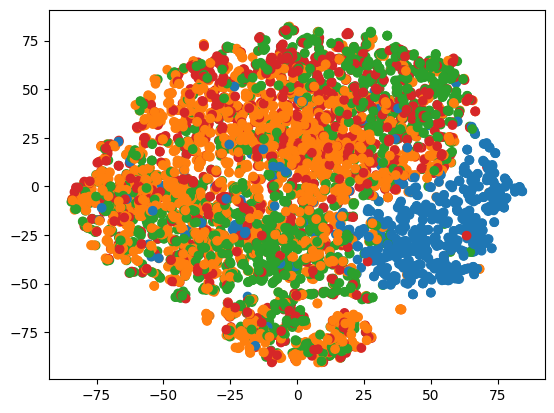

In [23]:
fig, ax = plt.subplots()
ax.scatter(
    x=transformed[:, 0],
    y=transformed[:, 1],
    c=[
        sns.color_palette()[x]
        for x in dataset.data_dict["train"]["target"].values
    ],
)
plt.show()

In [20]:
for x in dataset.data_dict["train"]["target"].values:
    print(x)

1
2
1
1
1
1
0
2
1
1
2
1
2
2
1
0
0
1
1
0
2
1
1
1
3
1
1
0
2
1
1
1
1
2
0
1
2
1
2
3
2
1
2
3
1
1
2
0
1
2
0
1
3
3
2
2
1
1
1
2
2
1
2
1
0
0
1
0
1
2
1
2
1
2
1
1
0
0
1
3
3
2
3
1
2
2
3
3
1
0
1
0
2
1
3
1
0
1
1
3
0
1
3
2
2
1
1
2
0
0
3
1
0
1
1
1
1
3
0
1
3
1
0
1
3
1
0
2
1
1
1
1
1
2
3
2
0
1
2
2
1
1
3
2
1
2
2
1
0
0
3
3
2
2
3
2
1
2
1
1
1
1
1
3
0
3
2
0
2
2
1
3
2
3
0
1
1
1
2
3
2
1
2
1
2
2
3
0
3
1
2
1
1
3
1
3
1
1
3
3
1
2
3
2
1
2
3
2
3
2
2
2
2
2
3
0
1
3
1
3
3
2
3
1
1
0
2
1
2
1
3
2
1
2
3
0
3
0
2
1
0
1
1
1
3
3
3
3
0
2
1
2
3
1
1
3
0
2
1
0
1
1
0
0
0
2
1
1
1
3
1
3
2
3
2
3
3
2
3
2
2
1
1
1
2
2
2
2
3
1
1
1
0
1
3
3
1
3
2
3
1
1
1
3
0
1
2
1
3
1
0
2
2
1
2
3
3
3
1
3
1
1
3
2
2
2
2
1
3
0
2
3
1
1
0
1
1
1
3
1
1
1
1
0
1
2
1
1
1
1
1
1
1
1
0
3
1
3
1
1
1
1
0
2
0
1
1
0
1
1
1
2
1
2
3
3
3
0
1
2
1
2
1
1
2
1
2
1
3
3
0
3
3
1
1
0
3
2
1
2
2
2
0
2
1
2
1
1
1
3
0
2
2
2
3
3
0
2
1
2
1
1
2
3
0
1
2
2
3
2
2
3
1
2
0
2
3
2
3
2
3
1
1
2
2
2
0
2
1
3
1
3
3
1
1
1
2
0
1
1
1
1
1
1
1
2
2
1
1
3
3
1
3
3
0
1
2
1
3
3
3
3
1
1
0
3
3
1
2
0
0
2
1
2
1
2
2
3
2
2


In [24]:
from clarin_datasets.abusive_clauses_dataset import AbusiveClausesDataset

In [26]:
dataset2 = AbusiveClausesDataset()
dataset2.load_data()

In [4]:
import pandas as pd

In [15]:
tokens_unzipped = dataset.data_dict["train"]["tokens"].tolist()
tokens_unzipped = np.array([x for subarray in tokens_unzipped for x in subarray])
labels_unzipped = dataset.data_dict["train"]["labels"].tolist()
labels_unzipped = np.array([x for subarray in labels_unzipped for x in subarray])
df_unzipped = pd.DataFrame(
    {
        "tokens": tokens_unzipped,
        "labels": labels_unzipped,
    }
)
df_unzipped = df_unzipped.loc[df_unzipped["labels"] != 0]
tokens_unzipped = df_unzipped["tokens"].values
labels_unzipped = df_unzipped["labels"].values

In [18]:
type(labels_unzipped)

numpy.ndarray